In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
final_train_set = pd.read_csv("datasets/final_train_set.csv")

In [5]:
final_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230119 entries, 0 to 230118
Data columns (total 10 columns):
Unnamed: 0               230119 non-null int64
subDirectory_filePath    230119 non-null object
face_x                   230119 non-null int64
face_y                   230119 non-null int64
face_width               230119 non-null int64
face_height              230119 non-null int64
facial_landmarks         230119 non-null object
expression               230119 non-null int64
valence                  230119 non-null float64
arousal                  230119 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 17.6+ MB


In [6]:
final_train_set.head()

,Unnamed: 0,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,0,174/37e473dbcd0153a8fe9c7e3b97e0d31b3d764b7920...,24,24,1033,1033,124.72;548.25;124.16;653.51;143.2;760.16;168.1...,2,-0.737578,-0.232919
1,1,911/3027321da92465f3a88b643628383ec54f18efc007...,23,23,158,158,23.82;75.34;22.98;94.47;24.8;115.29;30.06;132....,4,-0.155763,0.463581
2,2,647/584d7f29d5be7e10684a1e46956dd11b7a1d6665af...,38,38,258,258,57.02;142.58;57.43;171.14;62.94;200.57;70.69;2...,0,-0.047619,-0.031746
3,3,894/98034ce243cac89f2f63addd19c4736fa70bded976...,45,45,304,304,50.97;174.93;51.32;208.34;54.79;244.46;64.16;2...,1,0.831821,0.123153
4,4,738/4976968eaf6bfc261f1f05df9a9693cd98e74ae0b5...,64,64,429,429,105.85;256.65;107.79;301.82;116.3;343.56;129.4...,1,0.595238,-0.047447


In [7]:
import cv2
import matplotlib.pyplot as plt
from sys import getsizeof
import gc
%matplotlib inline

In [15]:
#validation_data["pixels"] = validation_data.apply(generate_gray_pixels, axis = 1)
final_train_set["image_location"] = final_train_set.apply(lambda row: generate_gray_pixels(row['subDirectory_filePath'],row['face_x'],row['face_y'],row['face_width'],row['face_height'],row['expression']), axis = 1)

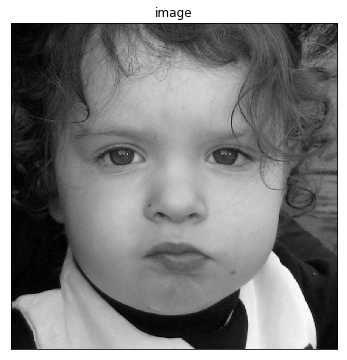

In [58]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("image")
ax1.imshow(c, cmap='gray')

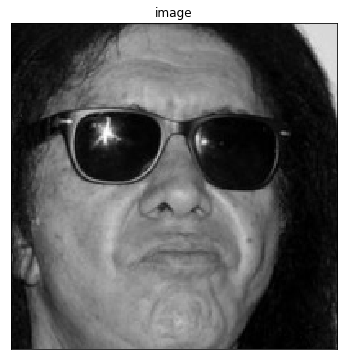

In [66]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("image")
ax1.imshow(new_image, cmap='gray')

In [9]:
#code to generate downsampled training set in which each category has 3000 images.
train_0 = pd.read_csv('train_0.csv')

In [10]:
train_0 = train_0[0:3000]

In [20]:
train_0 = train_0.drop(['face_x','face_y','face_width','face_height','facial_landmarks'], axis=1)

In [22]:
train_0 = train_0.drop('Unnamed: 0', axis = 1)

In [40]:
def generate_color_pixels(path, face_x, face_y, face_width, face_height,expression):
    orignal_path = path
    folder, image_name = path.split("/")
    path = "D:\\Documents\\ML Projects\\Datasets\\AMFED\\Manually_Annotated_Images\\"+folder+"\\"+image_name
    image_name = orignal_path.replace("/","_")
    color_image = cv2.imread(path)
    color_image = color_image[face_y:face_y+face_height, face_x:face_x+face_width]
    if color_image.shape[0] > 200:
        color_image = cv2.resize(color_image, dsize=(200,200),interpolation=cv2.INTER_AREA)
    elif color_image.shape[0] < 200:
        color_image = cv2.resize(color_image, dsize=(200,200),interpolation=cv2.INTER_CUBIC)
    name = "Images/train_images_cropped/"+str(expression)+"/"+image_name
#     name = "Images/full_validation/unknown_class/"+image_name

    cv2.imwrite(name,color_image)

In [8]:
train_0 = pd.read_csv('datasets/train_0.csv')
train_0 = train_0.drop(['Unnamed: 0','facial_landmarks'], axis=1)
train_0 = train_0[10000:]

train_1 = pd.read_csv('datasets/train_1.csv')
train_1 = train_1.drop(['Unnamed: 0','facial_landmarks'], axis=1)
train_1 = train_1[10000:]

train_2 = pd.read_csv('datasets/train_2.csv')
train_2 = train_2.drop(['Unnamed: 0','facial_landmarks'], axis=1)
train_2 = train_2[10000:]

train_3 = pd.read_csv('datasets/train_3.csv')
train_3 = train_3.drop(['Unnamed: 0','facial_landmarks'], axis=1)
train_3 = train_3[10000:]

# train_4 = pd.read_csv('datasets/train_4.csv')
# train_4 = train_4.drop(['Unnamed: 0','facial_landmarks'], axis=1)
# train_4 = train_4[3000:]

# train_5 = pd.read_csv('datasets/train_5.csv')
# train_5 = train_5.drop(['Unnamed: 0','facial_landmarks'], axis=1)
# train_5 = train_5[3000:]

train_6 = pd.read_csv('datasets/train_6.csv')
train_6 = train_6.drop(['Unnamed: 0','facial_landmarks'], axis=1)
train_6 = train_6[10000:]

# train_7 = pd.read_csv('datasets/train_7.csv')
# train_7 = train_7.drop(['Unnamed: 0','facial_landmarks'], axis=1)
# train_7 = train_7[0:3000]

In [20]:
train_0.tail()

,subDirectory_filePath,face_x,face_y,face_width,face_height,expression,valence,arousal
59894,277/906c20e58d847094c42d496477870785c817d31728...,165,165,1693,1693,0,0.000000,0.015873
59895,106/6710860df5f51104dfce52c818a3d529944901493a...,47,47,652,652,0,0.023810,0.023810
59896,956/2a997a0c35cb86b92def00ef25c00240a1c85d441e...,19,19,135,135,0,0.007884,0.007884
59897,1217/7cc0975507f8d64097f6185d9893769b080574eb4...,27,27,393,393,0,-0.394197,0.244402
59898,921/ad409d71803bfeccd843e65e0f79c75ac51b2826a1...,15,15,148,148,0,-0.060496,0.004321


In [21]:
#now merge all the training set of images of each category into one dataframe and randomize.
full_train_set = pd.concat([train_0,train_1,train_2,train_3,train_6])

In [43]:
full_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168975 entries, 0 to 168974
Data columns (total 9 columns):
subDirectory_filePath    168975 non-null object
face_x                   168975 non-null int64
face_y                   168975 non-null int64
face_width               168975 non-null int64
face_height              168975 non-null int64
expression               168975 non-null int64
valence                  168975 non-null float64
arousal                  168975 non-null float64
image_location           0 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 11.6+ MB


In [35]:
full_train_set = full_train_set.sample(frac=1).reset_index(drop=True)

In [30]:
full_train_set.to_csv("D:\\Documents\\ML Projects\\Datasets\\AMFED\\down_sampled_train_set_expanded.csv")

In [4]:
down_sampled_train_set = pd.read_csv("down_sampled_train_set.csv")

In [5]:
down_sampled_train_set = down_sampled_train_set.drop('Unnamed: 0', axis = 1)

In [43]:
down_sampled_train_set.head()

,subDirectory_filePath,face_x,face_y,face_width,face_height,expression,valence,arousal
0,157/23e83ef3f7035fb5e3d0d8d8d87526914c857a3698...,24,24,163,163,6,-0.367789,0.846883
1,1348/ee5febe854fe78cc1a66b4955f8c8af87c403e206...,75,75,501,501,1,0.747998,-0.094817
2,1241/36d19175e2e2a96b690c559a34d6e54458c659d08...,20,20,135,135,3,-0.063211,0.842815
3,915/7384357ea101a64e1a26bf80dc642b6fe2edb93891...,37,37,249,249,4,-0.119048,0.920635
4,371/72a9458465eda17c78e0a6e2a3011b5a4abdf78192...,21,21,144,144,3,0.150794,0.587302


In [42]:
full_train_set["image_location"] = full_train_set.apply(lambda row: generate_color_pixels(row['subDirectory_filePath'],row['face_x'],row['face_y'],row['face_width'],row['face_height'],row['expression']), axis = 1)

In [25]:
full_validation_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 5473
Data columns (total 8 columns):
subDirectory_filePath    4000 non-null object
face_x                   4000 non-null int64
face_y                   4000 non-null int64
face_width               4000 non-null int64
face_height              4000 non-null int64
expression               4000 non-null int64
valence                  4000 non-null float64
arousal                  4000 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 281.2+ KB


In [2]:
validation_full = pd.read_csv('datasets/validation.csv')
validation_full = validation_full.drop('facial_landmarks',axis=1)

In [21]:
validation_0 = validation_full[validation_full['expression'] == 0]
validation_1 = validation_full[validation_full['expression'] == 1]
validation_2 = validation_full[validation_full['expression'] == 2]
validation_3 = validation_full[validation_full['expression'] == 3]
validation_4 = validation_full[validation_full['expression'] == 4]
validation_5 = validation_full[validation_full['expression'] == 5]
validation_6 = validation_full[validation_full['expression'] == 6]
validation_7 = validation_full[validation_full['expression'] == 7]

In [27]:
validation_0 = validation_0[0:100]
validation_1 = validation_1[0:100]
validation_2 = validation_2[0:100]
validation_3 = validation_3[0:100]
validation_4 = validation_4[0:100]
validation_5 = validation_5[0:100]
validation_6 = validation_6[0:100]
validation_7 = validation_7[0:100]

In [34]:
down_sampled_validation_set = pd.concat([validation_0,validation_1,validation_2,validation_3,validation_4,validation_5,validation_6,validation_7])

In [24]:
full_validation_set = pd.concat([validation_0,validation_1,validation_2,validation_3,validation_4,validation_5,validation_6,validation_7])

In [27]:
full_validation_set = full_validation_set.sample(frac=1).reset_index(drop=True)

In [39]:
down_sampled_validation_set.to_csv('down_sampled_validation_set.csv')

In [31]:
full_validation_set.to_csv('datasets/full_validation_set.csv')

In [4]:
full_validation_set = pd.read_csv('datasets/full_validation_set.csv')

In [41]:
down_sampled_validation_set = down_sampled_validation_set.sample(frac=1).reset_index(drop=True)

In [43]:
down_sampled_validation_set.to_csv('down_sampled_validation_set.csv')

In [11]:
down_sampled_validation_set = pd.read_csv('down_sampled_validation_set.csv')

In [6]:
full_validation_set = full_validation_set.drop('Unnamed: 0',axis=1)

In [10]:
full_validation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
subDirectory_filePath    4000 non-null object
face_x                   4000 non-null int64
face_y                   4000 non-null int64
face_width               4000 non-null int64
face_height              4000 non-null int64
expression               4000 non-null int64
valence                  4000 non-null float64
arousal                  4000 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 250.1+ KB


In [11]:
full_validation_set["image_location"] = full_validation_set.apply(lambda row: generate_color_pixels(row['subDirectory_filePath'],row['face_x'],row['face_y'],row['face_width'],row['face_height'],row['expression']), axis = 1)

In [ ]:
down_sampled_train_set = pd.read_csv()

In [12]:
temp_df = down_sampled_train_set[0:5]

In [33]:
temp_df

,subDirectory_filePath,face_x,face_y,face_width,face_height,expression,valence,arousal,image_location
0,420/c37646f9c1f5d35552a9f8514fe1a34afab26ab5ce...,97,97,648,648,3,0.546845,0.803329,None
1,431/2b09fe93aea2833995a58e62669db92ee924a8da27...,23,23,158,158,4,-0.103175,0.619048,None
2,105/9077544f3d85a1a2e10fe0ba60517574a680d5f8f5...,21,21,144,144,3,0.343694,0.592748,None
3,657/b609bd2a5f14f55c585ccb34e3ef5c59f92a7c8fa8...,24,24,191,191,5,-0.498451,0.600077,None
4,505/3ca39655e2938cd73ea27083b03d8abd7d0d1f6e58...,49,49,330,330,6,-0.390446,0.666054,None


In [7]:
image = cv2.imread("D:\\Documents\\ML Projects\\Datasets\\AMFED\\experiment_images/2.jpg")

In [9]:
cv2.imwrite("experiment_images/2_edited.jpg",image)

True

In [7]:
cv2.imwrite("D:\\1_edited.jpg",image)

True

In [6]:
image.shape

(647, 647, 3)

In [15]:
my_str = "1063/d58cf2"
a, b = my_str.split("/")

In [16]:
a

'1063'

In [26]:
print("neeraj")

neeraj
